In [3]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [4]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1e7c7b94d00>)

In [5]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


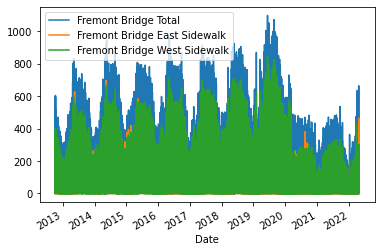

In [6]:
%matplotlib inline
#just to see how it will look in regular style we are not changing it to weekly
data.plot();

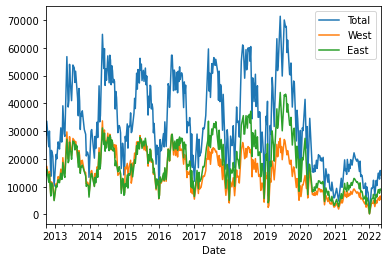

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fast')


data.columns = ['Total','West', 'East']



data.resample('W').sum().plot();

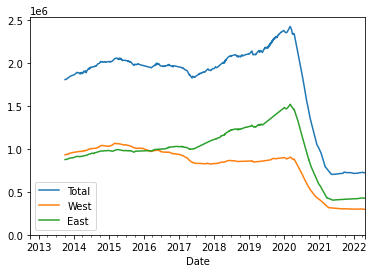

In [8]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

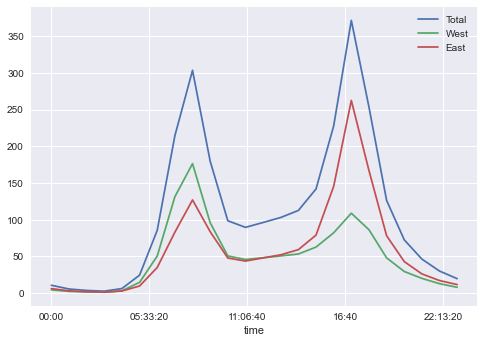

In [9]:
plt.style.use('seaborn')
data.groupby(data.index.time).mean().plot();

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

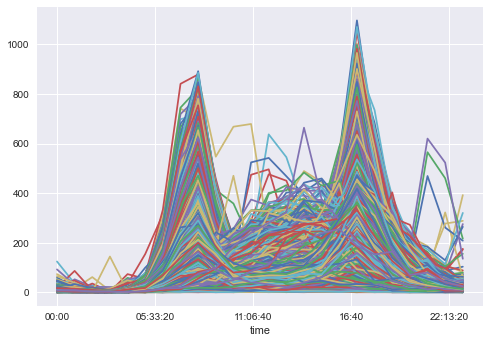

In [11]:
pivoted.plot(legend=False) #This should give us a line for each day of the year. 

<AxesSubplot:xlabel='time'>

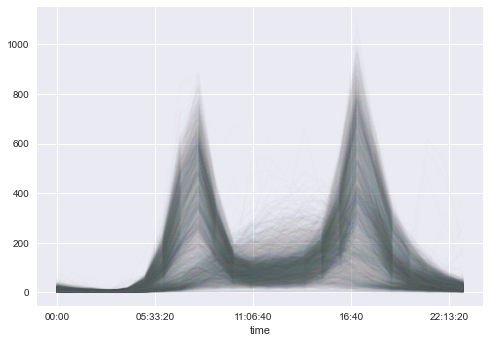

In [12]:
pivoted.plot(legend=False, alpha=0.01) #to make the graph a bit transparent so that we can see the diffrence 

In [13]:
x = pivoted.fillna(0).T.values
x.shape

(3496, 24)

In [14]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(x)

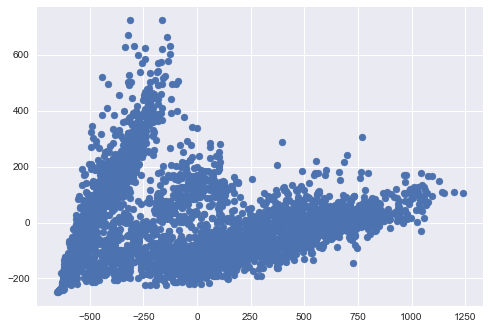

In [15]:
plt.scatter(X2[:, 0], X2[:, 1])

In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(x)
lables= gmm.predict(x)
lables

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

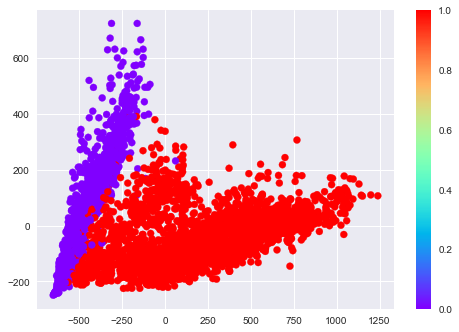

In [17]:
plt.scatter(X2[:, 0], X2[:, 1], c=lables, cmap='rainbow')
plt.colorbar()

In [18]:
daysOfWeek=pd.DatetimeIndex(pivoted.columns).dayofweek
daysOfWeek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
           dtype='int64', length=3496)

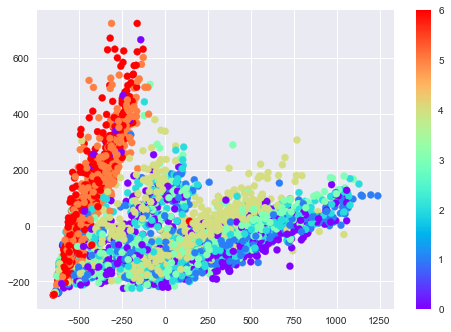

In [19]:
plt.scatter(X2[:, 0], X2[:, 1], c=daysOfWeek, cmap='rainbow')
plt.colorbar()

In [20]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(lables == 0) & (daysOfWeek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29', '2013-12-20', '2013-12-25',
               '2014-01-01', '2014-04-23', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-05-25', '2015-07-03', '2015-09-07', '2015-11-26',
               '2015-11-27', '2015-12-24', '2015-12-25', '2016-01-01',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-24',
               '2016-11-25', '2016-12-26', '2017-01-02', '2017-02-06',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-11-24', '2017-12-25', '2018-01-01', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-11-22', '2018-11-23',
               '2018-12-25', '2019-01-01', '2019-02-04', '2019-02-05',
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-05-27',
      

In this we can see that the dates mentioned here are mainly the public holidays so far.